In [35]:
import tensorflow as tf
#import torch
#import torch.nn as nn
#import torchvision
#import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
#from torch.autograd import Variable
import pandas as pd
import math
import sklearn.preprocessing as sk
#from tensorboardX import SummaryWriter
#import seaborn as sns
#from sklearn.model_selection import KFold
from sklearn import metrics
#from sklearn.feature_selection import VarianceThreshold
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import RidgeCV
#from sklearn.model_selection import train_test_split
import random

seed = 42
random.seed(seed)

N = 10000
M = 100
c = 0.5
p = 0.9
k = np.random.randn(M)
u1 = np.random.randn(M)
u1 -= u1.dot(k) * k / np.linalg.norm(k)**2
u1 /= np.linalg.norm(u1) 
k /= np.linalg.norm(k) 
u2 = k
w1 = c*u1
w2 = c*(p*u1+np.sqrt((1-p**2))*u2)
X = np.random.normal(0, 1, (N, M))
eps1 = np.random.normal(0, 0.01)
eps2 = np.random.normal(0, 0.01)
Y1 = np.matmul(X, w1) + np.sin(np.matmul(X, w1))+eps1
Y2 = np.matmul(X, w2) + np.sin(np.matmul(X, w2))+eps2
split = list(np.random.permutation(N))

X_train = X[split[0:8000],:]
Y1_train = Y1[split[0:8000]].reshape(-1,1)
Y2_train = Y2[split[0:8000]].reshape(-1,1)
X_valid = X[8000:9000,:]
Y1_valid = Y1[8000:9000].reshape(-1,1)
Y2_valid = Y2[8000:9000].reshape(-1,1)
X_test = X[9000:10000,:]
Y1_test = Y1[9000:10000].reshape(-1,1)
Y2_test = Y2[9000:10000].reshape(-1,1)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)
print(Y1_train.shape)
print(Y2_train.shape)
print(Y1_valid.shape)
print(Y2_valid.shape)
print(Y1_test.shape)
print(Y2_test.shape)
Y_train = np.concatenate((Y1_train.reshape(-1,1), Y2_train.reshape(-1,1)), axis=1)
Y_valid = np.concatenate((Y1_valid.reshape(-1,1), Y2_valid.reshape(-1,1)), axis=1)
Y_test = np.concatenate((Y1_test.reshape(-1,1), Y2_test.reshape(-1,1)), axis=1)
print(Y_train.shape)
print(Y_valid.shape)
print(Y_test.shape)

(8000, 100)
(1000, 100)
(1000, 100)
(8000, 1)
(8000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(1000, 1)
(8000, 2)
(1000, 2)
(1000, 2)


Epoch: 0, Train Cost: 1.930 
Epoch: 0, Dev Cost: 1.204 
Epoch: 1, Train Cost: 1.065 
Epoch: 1, Dev Cost: 1.019 
Epoch: 2, Train Cost: 0.961 
Epoch: 2, Dev Cost: 0.938 
Epoch: 3, Train Cost: 0.929 
Epoch: 3, Dev Cost: 0.918 
Epoch: 4, Train Cost: 0.914 
Epoch: 4, Dev Cost: 0.901 
Epoch: 5, Train Cost: 0.900 
Epoch: 5, Dev Cost: 0.897 
Epoch: 6, Train Cost: 0.883 
Epoch: 6, Dev Cost: 0.883 
Epoch: 7, Train Cost: 0.864 
Epoch: 7, Dev Cost: 0.845 
Epoch: 8, Train Cost: 0.807 
Epoch: 8, Dev Cost: 0.774 
Epoch: 9, Train Cost: 0.722 
Epoch: 9, Dev Cost: 0.666 
Epoch: 10, Train Cost: 0.619 
Epoch: 10, Dev Cost: 0.567 
Epoch: 11, Train Cost: 0.548 
Epoch: 11, Dev Cost: 0.507 
Epoch: 12, Train Cost: 0.482 
Epoch: 12, Dev Cost: 0.452 
Epoch: 13, Train Cost: 0.442 
Epoch: 13, Dev Cost: 0.439 
Epoch: 14, Train Cost: 0.429 
Epoch: 14, Dev Cost: 0.428 
Epoch: 15, Train Cost: 0.396 
Epoch: 15, Dev Cost: 0.373 
Epoch: 16, Train Cost: 0.378 
Epoch: 16, Dev Cost: 0.370 
Epoch: 17, Train Cost: 0.356 
Epoc

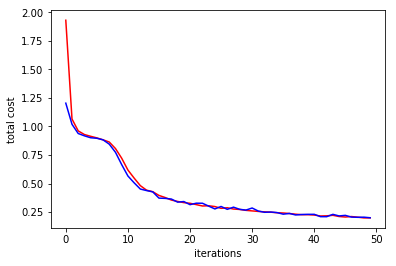

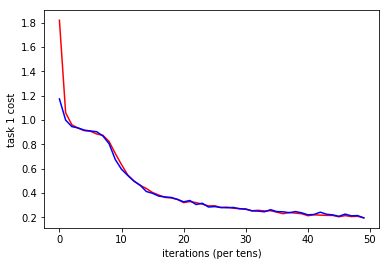

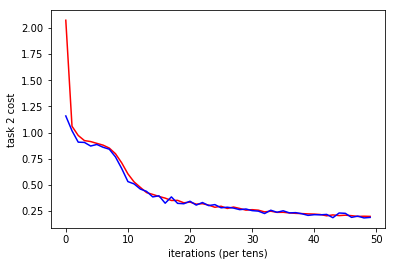

In [46]:
learning_rate = 0.001
mb_size = 100
n_shared = 64
n_hidden1 = 32
n_hidden2 = 16
num_epochs = 50
#keep_prob = 1
n_output = 1

def PlaceHolder(dims):
    PH = tf.placeholder(tf.float32, [None, dims])
    return PH 

def Shared_layer(dat, keep_prob):

    H1 = tf.layers.dense(inputs=dat, units=n_shared, activation=tf.nn.relu)
    Drop_H1 = tf.nn.dropout(H1, keep_prob)
    #bn_Drop_H1 = tf.contrib.layers.batch_norm(Drop_H1, center =True, scale = True)    

    return Drop_H1

def Tower_layer1(dat, keep_prob):

    H1_1 = tf.layers.dense(inputs=dat, units=n_hidden1, activation=tf.nn.relu)
    Drop_H1_1 = tf.nn.dropout(H1_1, keep_prob)
    #bn_Drop_H1 = tf.contrib.layers.batch_norm(Drop_H1, center =True, scale = True)

    H2_1 = tf.layers.dense(inputs=Drop_H1_1, units=n_hidden2, activation=tf.nn.relu)
    Drop_H2_1 = tf.nn.dropout(H2_1, keep_prob)
    #bn_Drop_H2 = tf.contrib.layers.batch_norm(Drop_H2, center =True, scale = True)

    H3_1 = tf.layers.dense(inputs=Drop_H2_1, units=n_output)

    return H3_1

def Tower_layer2(dat, keep_prob):

    H1_2 = tf.layers.dense(inputs=dat, units=n_hidden1, activation=tf.nn.relu)
    Drop_H1_2 = tf.nn.dropout(H1_2, keep_prob)
    #bn_Drop_H1 = tf.contrib.layers.batch_norm(Drop_H1, center =True, scale = True)

    H2_2 = tf.layers.dense(inputs=Drop_H1_2, units=n_hidden2, activation=tf.nn.relu)
    Drop_H2_2 = tf.nn.dropout(H2_2, keep_prob)
    #bn_Drop_H2 = tf.contrib.layers.batch_norm(Drop_H2, center =True, scale = True)

    H3_2 = tf.layers.dense(inputs=Drop_H2_2, units=n_output)

    return H3_2

def compute_cost(Y_pred, Y_true):

    Logits = Y_pred
    Labels = Y_true 
    #Labels = tf.reshape(Labels, [-1,1])
    Loss = tf.losses.mean_squared_error(Labels, Logits)
    cost = tf.reduce_mean(Loss)       
    return cost

def random_mini_batches(XE, R1E, R2E, mini_batch_size = 10, seed = 42): 
    # Creating the mini-batches
    np.random.seed(seed)            
    m = XE.shape[0]                  
    mini_batches = []
    permutation = list(np.random.permutation(m))
    shuffled_XE = XE[permutation,:]
    shuffled_X1R = R1E[permutation]
    shuffled_X2R = R2E[permutation]
    num_complete_minibatches = math.floor(m/mini_batch_size)
    for k in range(0, int(num_complete_minibatches)):
        mini_batch_XE = shuffled_XE[k * mini_batch_size : (k+1) * mini_batch_size, :]
        mini_batch_X1R = shuffled_X1R[k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch_X2R = shuffled_X2R[k * mini_batch_size : (k+1) * mini_batch_size]
        mini_batch = (mini_batch_XE, mini_batch_X1R, mini_batch_X2R)
        mini_batches.append(mini_batch)
    Lower = int(num_complete_minibatches * mini_batch_size)
    Upper = int(m - (mini_batch_size * math.floor(m/mini_batch_size)))
    if m % mini_batch_size != 0:
        mini_batch_XE = shuffled_XE[Lower : Lower + Upper, :]
        mini_batch_X1R = shuffled_X1R[Lower : Lower + Upper]
        mini_batch_X2R = shuffled_X2R[Lower : Lower + Upper]
        mini_batch = (mini_batch_XE, mini_batch_X1R, mini_batch_X2R)
        mini_batches.append(mini_batch)
    
    return mini_batches

seed = 42 
tf.set_random_seed(seed)    
(n_samp, n_gene) = X_train.shape
(n_samp, n_out) = Y_train.shape
cost1tr = []
cost2tr = []
cost1D = []
cost2D = []
cost1ts = []
cost2ts = []
costtr = []
costD = []
costts = []

tf.reset_default_graph()

X = PlaceHolder(n_gene)
Y1 = PlaceHolder(n_output)
Y2 = PlaceHolder(n_output)
kp = tf.placeholder(tf.float32)

H_shared = Shared_layer(X, kp)
H1 = Tower_layer1(H_shared, kp)
H2 = Tower_layer2(H_shared, kp)
        
cost1 = compute_cost(H1, Y1)
cost2 = compute_cost(H2, Y2)

cost = tf.divide(tf.add(cost1, cost2), 2)

optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)
    
init = tf.global_variables_initializer()

with tf.Session() as sess:       
    sess.run(init)
    for epoch in range(num_epochs):
        epoch_cost = 0  
        epoch_cost1 = 0
        epoch_cost2 = 0
        
        num_minibatches = int(n_samp / mb_size) 
        minibatches = random_mini_batches(X_train, Y1_train, Y2_train, mb_size, seed)

        for minibatch in minibatches:
            (mb_X, mb_Y1, mb_Y2) = minibatch
            _ , minibatch_cost= sess.run([optimizer, cost], feed_dict={X: mb_X, Y1: mb_Y1, Y2: mb_Y2, kp: 0.5})
            epoch_cost = epoch_cost + (minibatch_cost / num_minibatches)
            
            mb_cost1 = sess.run(cost1, feed_dict={X: mb_X, Y1: mb_Y1, Y2: mb_Y2, kp: 0.5})
            epoch_cost1 = epoch_cost1 + (mb_cost1 / num_minibatches)
            
            mb_cost2 = sess.run(cost2, feed_dict={X: mb_X, Y1: mb_Y1, Y2: mb_Y2, kp: 0.5})
            epoch_cost2 = epoch_cost2 + (mb_cost2 / num_minibatches)
            
        if epoch % 1 == 0:
            print('Epoch: %d, Train Cost: %5.3f ' % (epoch, epoch_cost))
            dv_cost = sess.run(cost, feed_dict={X: X_valid, Y1: Y1_valid, Y2: Y2_valid, kp: 0.5})
            dv_cost1 = sess.run(cost1, feed_dict={X: X_valid, Y1: Y1_valid, Y2: Y2_valid, kp: 0.5})
            cost1D.append(dv_cost1)
            dv_cost2 = sess.run(cost2, feed_dict={X: X_valid, Y1: Y1_valid, Y2: Y2_valid, kp: 0.5})
            cost2D.append(dv_cost2)
            #dv_cost = (dv_cost1+dv_cost2)/2

            print('Epoch: %d, Dev Cost: %5.3f ' % (epoch, dv_cost))
        costtr.append(np.mean(epoch_cost))
        cost1tr.append(np.mean(epoch_cost1))
        cost2tr.append(np.mean(epoch_cost2))
        costD.append(dv_cost)

plt.plot(np.squeeze(costtr),'-r',np.squeeze(costD), '-b')
plt.ylabel('total cost')
plt.xlabel('iterations')
plt.show()

plt.plot(np.squeeze(cost1tr), '-r', np.squeeze(cost1D), '-b')
plt.ylabel('task 1 cost')
plt.xlabel('iterations (per tens)')
plt.show() 

plt.plot(np.squeeze(cost2tr),'-r', np.squeeze(cost2D),'-b')
plt.ylabel('task 2 cost')
plt.xlabel('iterations (per tens)')
plt.show()
